In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('/Users/professorx/Projects/Flight-Dynamic-Pricing-Model/data/Clean_Dataset.csv')
df.head()


,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [8]:
df = df.drop(columns='Unnamed: 0')
print("Dropped column")

Dropped column


In [9]:
df['route'] = df['source_city']+"-"+df['destination_city']
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,route
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,Delhi-Mumbai
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,Delhi-Mumbai
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,Delhi-Mumbai
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,Delhi-Mumbai
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,Delhi-Mumbai


In [11]:
# Top routes
top_routes = df['route'].value_counts().head(15)
top_routes

route
Delhi-Mumbai         15289
Mumbai-Delhi         14809
Delhi-Bangalore      14012
Bangalore-Delhi      13756
Bangalore-Mumbai     12939
Mumbai-Bangalore     12885
Mumbai-Kolkata       12602
Delhi-Kolkata        11934
Kolkata-Mumbai       11467
Delhi-Chennai        10780
Kolkata-Delhi        10506
Mumbai-Hyderabad     10470
Mumbai-Chennai       10130
Hyderabad-Mumbai     10064
Bangalore-Kolkata    10028
Name: count, dtype: int64

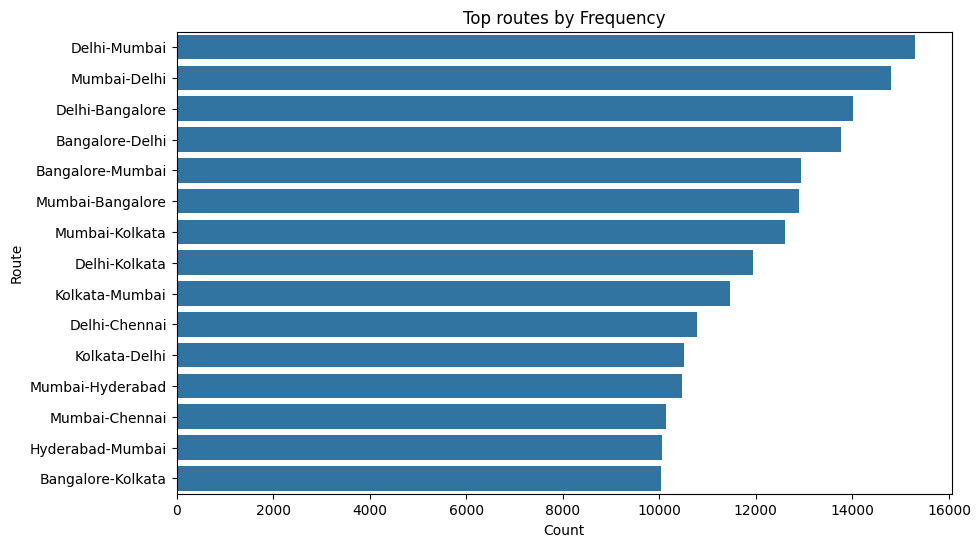

In [17]:
plt.figure(figsize=(10,6))
sns.barplot(x=top_routes.values,
           y=top_routes.index)
plt.title("Top routes by Frequency")
plt.xlabel("Count")
plt.ylabel("Route")
plt.show()

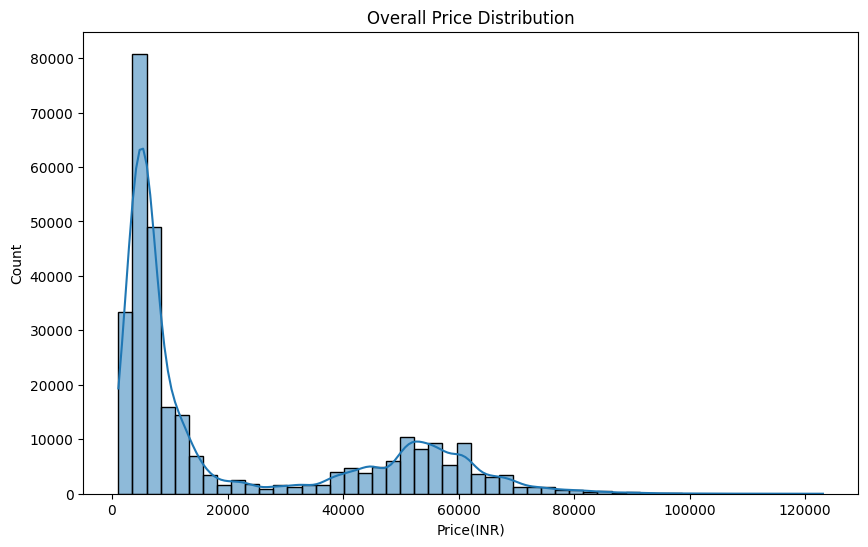

In [18]:
plt.figure(figsize=(10,6))
sns.histplot(df['price'],bins=50,kde=True)
plt.title("Overall Price Distribution")
plt.xlabel("Price(INR)")
plt.show()

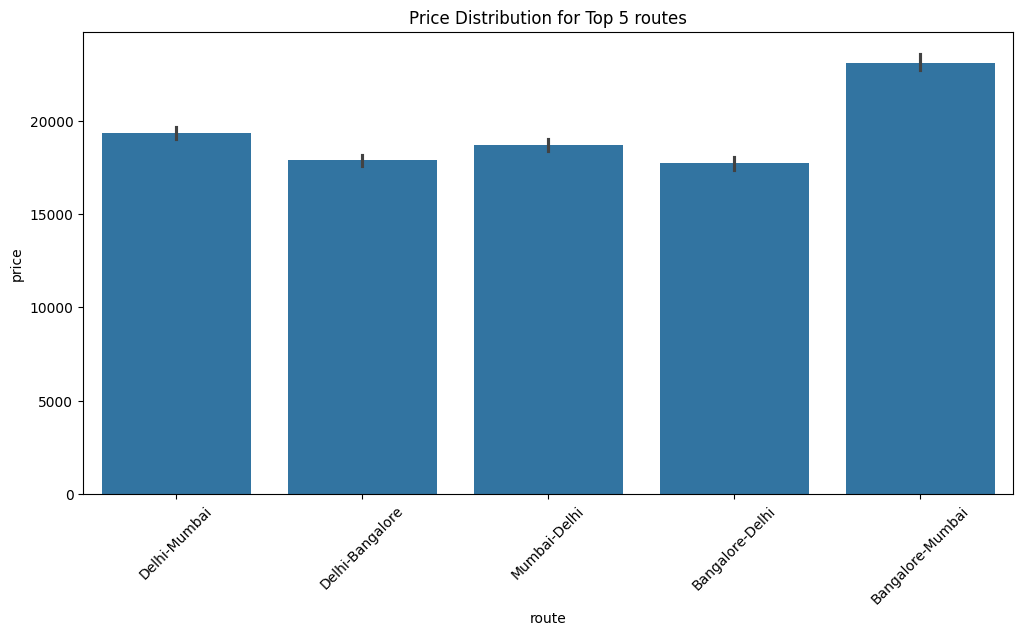

In [21]:
plt.figure(figsize=(12,6))
top5_routes = df['route'].value_counts().head(5).index.tolist()

sns.barplot(
    data=df[df['route'].isin(top5_routes)],
    x='route',
    y='price'
)

plt.xticks(rotation=45)
plt.title("Price Distribution for Top 5 routes")
plt.show()

In [22]:
# 10 routes for automated suggestion

route_counts = df['route'].value_counts()
selected_routes = route_counts.head(10).index.tolist()
selected_routes

['Delhi-Mumbai',
 'Mumbai-Delhi',
 'Delhi-Bangalore',
 'Bangalore-Delhi',
 'Bangalore-Mumbai',
 'Mumbai-Bangalore',
 'Mumbai-Kolkata',
 'Delhi-Kolkata',
 'Kolkata-Mumbai',
 'Delhi-Chennai']

In [23]:
# Global max min
df['price'].describe()

count    300153.000000
mean      20889.660523
std       22697.767366
min        1105.000000
25%        4783.000000
50%        7425.000000
75%       42521.000000
max      123071.000000
Name: price, dtype: float64

In [25]:
route_price_stats = df.groupby('route')['price'].agg(['min','max','mean','median']).sort_values("mean",ascending=False)
route_price_stats

,min,max,mean,median
route,,,,
Chennai-Bangalore,1443,107597,25081.850454,10469.0
Kolkata-Chennai,2966,95183,23660.361040,8589.0
Bangalore-Kolkata,3026,105168,23500.061229,8112.0
Bangalore-Chennai,1603,90720,23321.850078,9241.0
Mumbai-Bangalore,2074,114523,23147.873807,7192.0
Bangalore-Mumbai,2150,103819,23128.618672,7113.0
Mumbai-Chennai,1890,111964,22781.899112,8148.0
Chennai-Mumbai,1830,114704,22765.849647,8233.0
Kolkata-Bangalore,3465,105638,22744.808428,8111.0


In [26]:
min_price = df['price'].quantile(0.05)
max_price = df['price'].quantile(0.95)
(min_price,max_price)

(2436.0, 63277.0)

- max is very high, taking top_routes as grid 

In [33]:
top_routes_df = df[df['route'].isin(selected_routes)].reset_index(drop=True)
top_routes_df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,route
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,Delhi-Mumbai
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,Delhi-Mumbai
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,Delhi-Mumbai
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,Delhi-Mumbai
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,Delhi-Mumbai
...,...,...,...,...,...,...,...,...,...,...,...,...
130468,Vistara,UK-720,Kolkata,Early_Morning,one,Night,Mumbai,Business,14.83,49,70431,Kolkata-Mumbai
130469,Vistara,UK-706,Kolkata,Morning,one,Evening,Mumbai,Business,8.08,49,72201,Kolkata-Mumbai
130470,Vistara,UK-706,Kolkata,Morning,one,Night,Mumbai,Business,9.83,49,72783,Kolkata-Mumbai
130471,Vistara,UK-720,Kolkata,Early_Morning,one,Night,Mumbai,Business,12.92,49,72783,Kolkata-Mumbai


In [34]:
top_routes_df['price'].describe()

count    130473.000000
mean      20345.535176
std       22512.096804
min        1998.000000
25%        4765.000000
50%        7332.000000
75%       39783.000000
max      117307.000000
Name: price, dtype: float64

In [35]:
top_routes_df['class'].unique()

array(['Economy', 'Business'], dtype=object)

In [36]:
top_economy_routes_df = top_routes_df[top_routes_df['class'].str.lower() == "economy"].copy()

In [38]:
top_economy_routes_df["price"].quantile([0.05,0.5,0.95])

0.05     2339.0
0.50     5805.0
0.95    13608.0
Name: price, dtype: float64

In [44]:
top_economy_routes_df['route'].unique().tolist()

['Delhi-Mumbai',
 'Delhi-Bangalore',
 'Delhi-Kolkata',
 'Delhi-Chennai',
 'Mumbai-Delhi',
 'Mumbai-Bangalore',
 'Mumbai-Kolkata',
 'Bangalore-Delhi',
 'Bangalore-Mumbai',
 'Kolkata-Mumbai']

In [ ]:
PRICE_GRID = [2500, 3500, 4500, 5500, 6500, 7500, 8500, 10000, 12000]